# Supermarket Sales

### Import Library
A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer.

In [2]:
# Import Library
import numpy as np
import pandas as pd #dataframe
from matplotlib import pyplot as plt #for data visualization
import seaborn as sns #for data visualization
from scipy import stats
import calendar
#show plots in Jupyter Notebook browser
%matplotlib inline
sns.set(rc={'figure.figsize':(12,10)})
from wordcloud import WordCloud

### Data Extraction
Data extraction is the act or process of retrieving data out of data sources for further data processing or data storage

In [3]:
# Getting the dataset from folder
df = pd.read_csv(r'Dataset\Sales data\supermarket_sales - Sheet1.csv', parse_dates=['Date'])
df.head() # show first five row of the data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Information on Data

In [376]:
df.shape

(1000, 17)

In [4]:
# Check type of data for each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# checking any null value
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
# Basic statistics information of the data (interger and float datatype)
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [12]:
# Show count and unique value (string and object value)
df.describe(include=['O'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,764-44-8999,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [13]:
# Investigate all the elements whithin each Feature
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Invoice ID :1000
The number of values for feature Branch :3 -- ['A' 'B' 'C']
The number of values for feature City :3 -- ['Mandalay' 'Naypyitaw' 'Yangon']
The number of values for feature Customer type :2 -- ['Member' 'Normal']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Product line :6 -- ['Electronic accessories' 'Fashion accessories' 'Food and beverages'
 'Health and beauty' 'Home and lifestyle' 'Sports and travel']
The number of values for feature Unit price :943
The number of values for feature Quantity :10
The number of values for feature Tax 5% :990
The number of values for feature Total :990
The number of values for feature Date :89
The number of values for feature Time :506
The number of values for feature Payment :3 -- ['Cash' 'Credit card' 'Ewallet']
The number of values for feature cogs :990
The number of values for feature gross margin percentage :1 -- [4.76190476]
The number of values fo

### Data Cleaning: There is no need because there are no duplicate or missing values.
Data cleaning is the process of detecting and correcting corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

### Data wrangling and visualization
Data wrangling is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes.

Data visualization the representation of information in the form of a chart, diagram, picture, etc

In [360]:
df_date = df.copy()
aggregation_functions = {'Unit price': 'sum', 'Quantity': 'sum', 'Tax 5%': 'sum', 'Total': 'sum', 'gross income': 'sum'}
df_date = df_date.groupby(df['Date']).aggregate(aggregation_functions).reset_index()
df_date['Date'] = df_date['Date'].dt.strftime('%d-%m-%Y')
df_date.head()

,Date,Unit price,Quantity,Tax 5%,Total,gross income
0,01-01-2019,659.95,81,225.9610,4745.1810,225.9610
1,02-01-2019,357.08,48,92.6430,1945.5030,92.6430
2,03-01-2019,475.66,37,98.9585,2078.1285,98.9585
3,04-01-2019,310.46,32,77.3185,1623.6885,77.3185
4,05-01-2019,739.64,55,168.4135,3536.6835,168.4135


Text(0, 0.5, 'Gross Income')

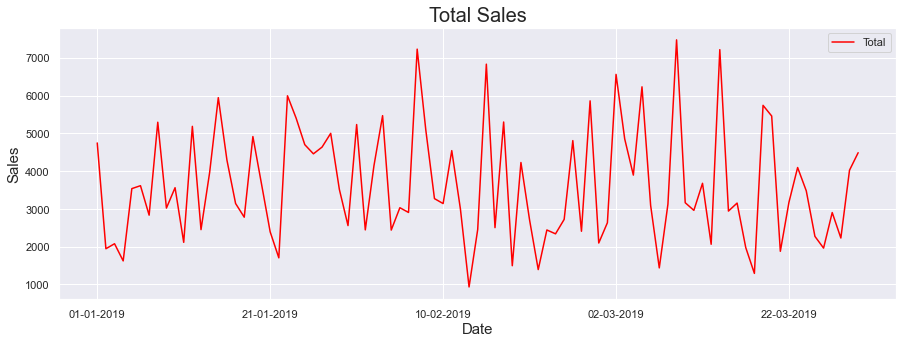

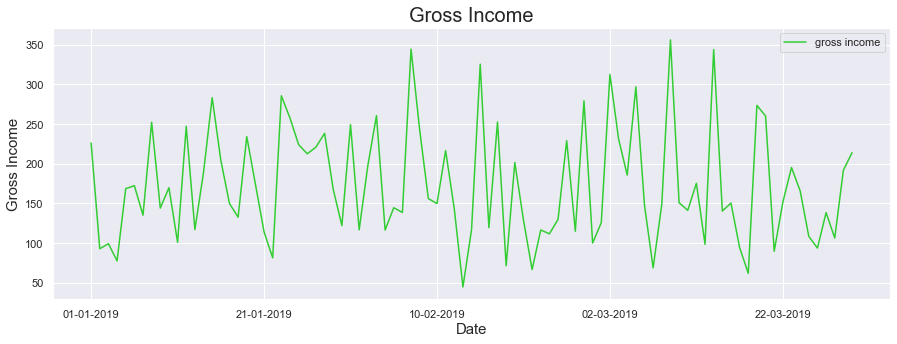

In [361]:
df_date.plot(x = 'Date', y = 'Total', figsize=(15, 5), color='red').figure
plt.title('Total Sales', size =20)
plt.xlabel('Date', size =15)
plt.ylabel('Sales', size =15)

df_date.plot(x = 'Date', y = 'gross income', figsize=(15, 5), color='limegreen').figure
plt.title('Gross Income', size =20)
plt.xlabel('Date', size =15)
plt.ylabel('Gross Income', size =15)

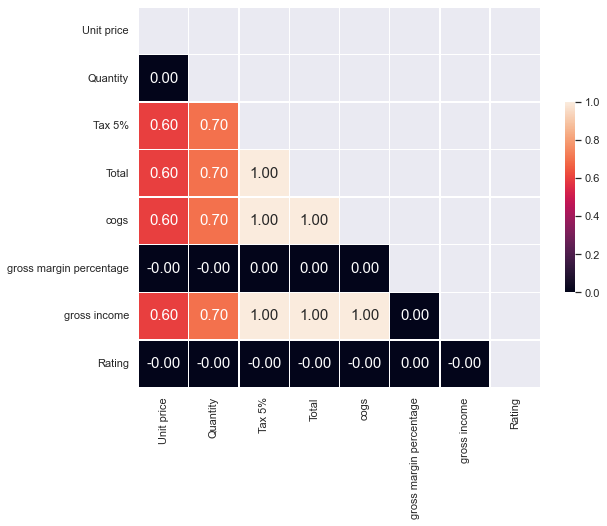

In [197]:
#find correlation betwwen columns
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(9, 7))
with sns.axes_style('white'):
    ax = sns.heatmap(corr.round(1), 
                     linewidths=.4, 
                     mask=mask, 
                     annot=True, 
                     annot_kws={"size": 15}, 
                     fmt=".2f", 
                     cbar_kws={"shrink": .50})

Text(0.5, 1.0, 'Total Sales of Product')

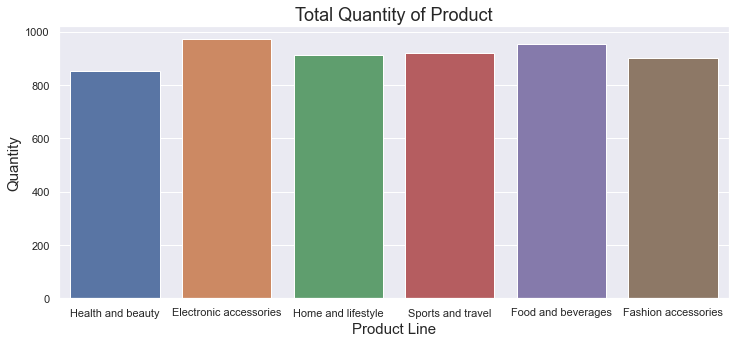

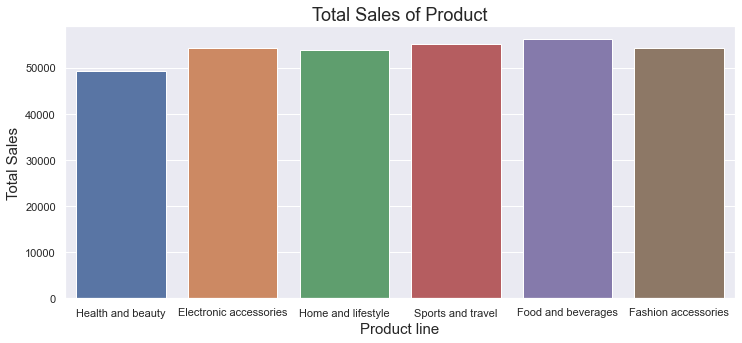

In [6]:
df_product = df.copy()
plt.figure(figsize=(12,5))
sns.barplot(x = "Product line", y = "Quantity", estimator = sum, data=df_product, ci=False)
plt.xlabel("Product Line", size=15)
plt.ylabel("Quantity", size=15)
plt.title("Total Quantity of Product", size=18)

plt.figure(figsize=(12,5))
sns.barplot(x = "Product line", y = "Total", estimator = sum, data=df_product, ci=False)
plt.xlabel("Product line", size=15)
plt.ylabel("Total Sales", size=15)
plt.title("Total Sales of Product", size=18)

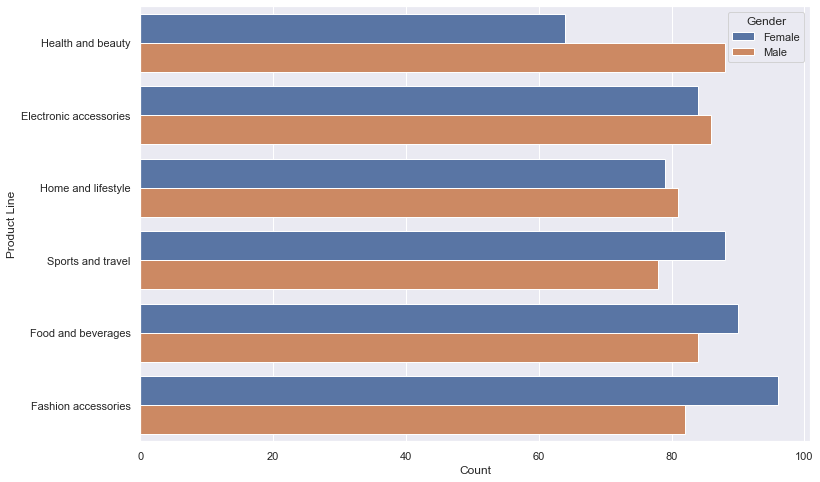

In [386]:
plt.figure(figsize=(12,8))
sns.countplot(y ='Product line', hue = "Gender", data = df_product) 
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.show()

Text(0.5, 1.0, 'Total Sales by Branch')

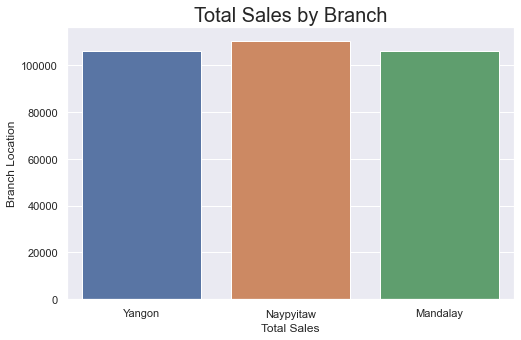

In [365]:
df_branch = df.copy()
df_branch['Date'] = df_branch['Date'].dt.strftime('%d-%m-%Y')
plt.figure(figsize=(8,5))
sns.barplot(x = 'City', y = 'Total', estimator=sum, data=df_branch, ci=False)
plt.ylabel("Branch Location", size=12)
plt.xlabel("Total Sales", size=12)
plt.title("Total Sales by Branch", size=20)

In [332]:
aggregation_functions = {'Total': 'sum', 'cogs':'sum', 'gross income': 'sum'}
df_branch_product = df_branch.groupby(['City','Product line']).aggregate(aggregation_functions).reset_index()
df_branch_product.head()

,City,Product line,Total,cogs,gross income
0,Mandalay,Electronic accessories,17051.4435,16239.47,811.9735
1,Mandalay,Fashion accessories,16413.3165,15631.73,781.5865
2,Mandalay,Food and beverages,15214.8885,14490.37,724.5185
3,Mandalay,Health and beauty,19980.6600,19029.20,951.4600
4,Mandalay,Home and lifestyle,17549.1645,16713.49,835.6745


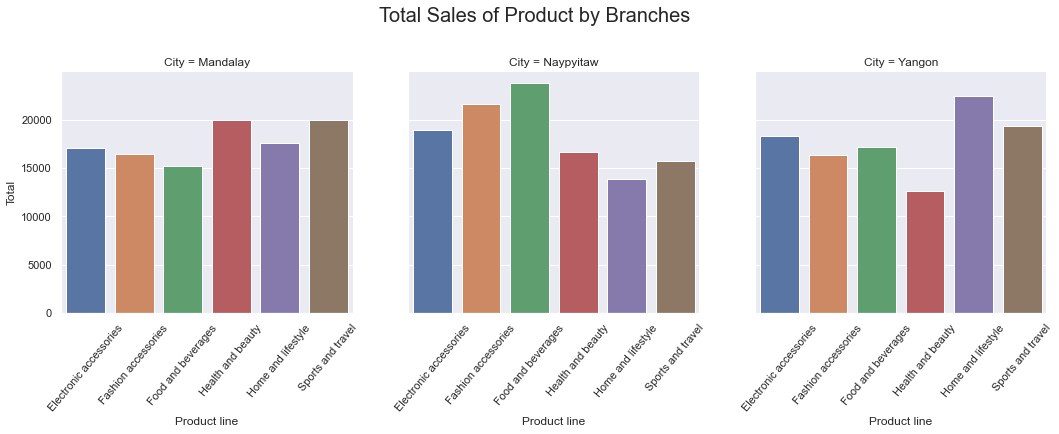

In [300]:
ax = sns.catplot(x="Product line", y="Total", col="City", kind="bar", ci = None, data=df_branch_product)
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle('Total Sales of Product by Branches', size=20)
for axes in ax.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=50)
plt.show()

In [367]:
aggregation_functions = {'Total': 'sum', 'cogs':'sum','gross income': 'sum'}
df_branch_date = df_branch.groupby(['Date', 'City']).aggregate(aggregation_functions).reset_index()
df_branch_date

,Date,City,Total,cogs,gross income
0,01-01-2019,Mandalay,1536.6960,1463.52,73.1760
1,01-01-2019,Naypyitaw,837.1650,797.30,39.8650
2,01-01-2019,Yangon,2371.3200,2258.40,112.9200
3,01-02-2019,Naypyitaw,1532.6010,1459.62,72.9810
4,01-02-2019,Yangon,911.9355,868.51,43.4255
...,...,...,...,...,...
258,30-03-2019,Naypyitaw,1441.9860,1373.32,68.6660
259,30-03-2019,Yangon,1320.6165,1257.73,62.8865
260,31-01-2019,Mandalay,2782.2795,2649.79,132.4895
261,31-01-2019,Naypyitaw,1862.0595,1773.39,88.6695


Total Member Customer :  501
Total Normal Customer :  499


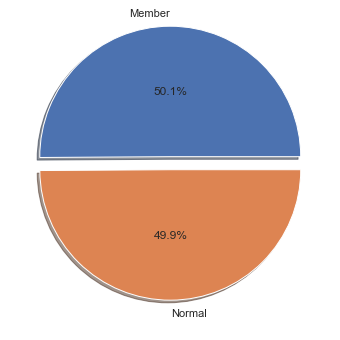

,Customer_type,Total,cogs,gross income
0,Member,164223.444,156403.28,7820.164
1,Normal,158743.305,151184.10,7559.205


In [330]:
df_customer = df.copy()
df_customer = df_customer.rename(columns={'Customer type': 'Customer_type'})
len_member = len(df_customer["Customer_type"][df_customer.Customer_type == "Member"])
len_normal = len(df_customer["Customer_type"][df_customer.Customer_type == "Normal"])

arr = np.array([len_member , len_normal]) 
labels = ['Member', 'Normal'] 
print("Total Member Customer : ", len_member)
print("Total Normal Customer : ", len_normal)

plt.subplots(figsize=(8, 6))
plt.pie(arr, labels=labels, shadow=True, autopct='%1.1f%%', pctdistance=0.5, explode = [0.1,0.0]) 
plt.show()

aggregation_functions = {'Total': 'sum', 'cogs':'sum','gross income': 'sum'}
df_customer = df_customer.groupby(['Customer_type']).aggregate(aggregation_functions).reset_index()
df_customer

Gender Female :  501
Gender Male :  499


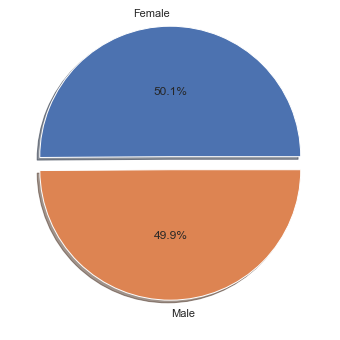

,Gender,Total,cogs,gross income
0,Female,167882.925,159888.50,7994.425
1,Male,155083.824,147698.88,7384.944


In [333]:
df_gender = df.copy()
len_female = len(df_gender["Gender"][df_gender.Gender == "Female"])
len_male = len(df_gender["Gender"][df_gender.Gender == "Male"])

arr = np.array([len_female , len_male]) 
labels = ['Female', 'Male'] 
print("Gender Female : ", len_female)
print("Gender Male : ", len_male)

plt.subplots(figsize=(8, 6))
plt.pie(arr, labels=labels, shadow=True, autopct='%1.1f%%', pctdistance=0.5, explode = [0.1,0.0]) 
plt.show()

aggregation_functions = {'Total': 'sum', 'cogs':'sum','gross income': 'sum'}
df_gender = df_gender.groupby(['Gender']).aggregate(aggregation_functions).reset_index()
df_gender

Payment using Ewallet :  345
Payment using Cash :  344
Payment using  Credit card:  311


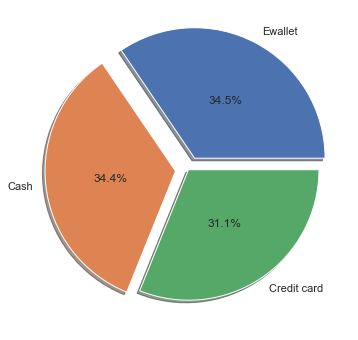

,Payment,Total,cogs,gross income
0,Cash,112206.570,106863.40,5343.170
1,Credit card,100767.072,95968.64,4798.432
2,Ewallet,109993.107,104755.34,5237.767


In [335]:
df_payment = df.copy()
len_ewallet = len(df_payment["Payment"][df_payment.Payment == "Ewallet"])
len_cash = len(df_payment["Payment"][df_payment.Payment == "Cash"])
len_credit = len(df_payment["Payment"][df_payment.Payment == "Credit card"])

arr = np.array([len_ewallet , len_cash, len_credit]) 
labels = ['Ewallet', 'Cash', 'Credit card'] 
print("Payment using Ewallet : ", len_ewallet)
print("Payment using Cash : ", len_cash)
print("Payment using  Credit card: ", len_credit)

plt.subplots(figsize=(8, 6))
plt.pie(arr, labels=labels, shadow=True, autopct='%1.1f%%', pctdistance=0.5, explode = [0.1,0.1,0.0]) 
plt.show()

aggregation_functions = {'Total': 'sum', 'cogs':'sum','gross income': 'sum'}
df_payment = df_payment.groupby(['Payment']).aggregate(aggregation_functions).reset_index()
df_payment

mean: 322.96674899999994 
median: 253.848


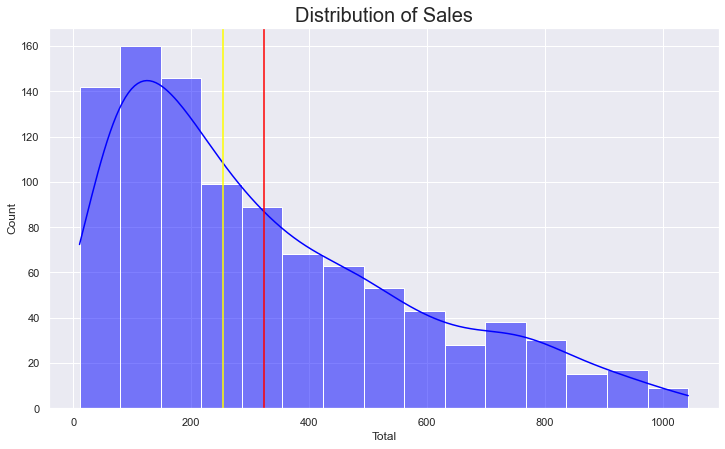

In [287]:
plt.subplots(figsize=(12, 7))
sns.histplot(data=df, x="Total", kde=True, color = 'blue')
plt.title('Distribution of Sales', size=20)
mean = df["Total"].mean()
median = df["Total"].median()
plt.axvline(mean, 0,1, color = 'red')
plt.axvline(median, 0,1, color = 'yellow')
print('mean:', mean, '\nmedian:', median)

mean: 1521.098 
median: 1519.0 
mode:
 0    1442.0
1    1948.0
dtype: float64


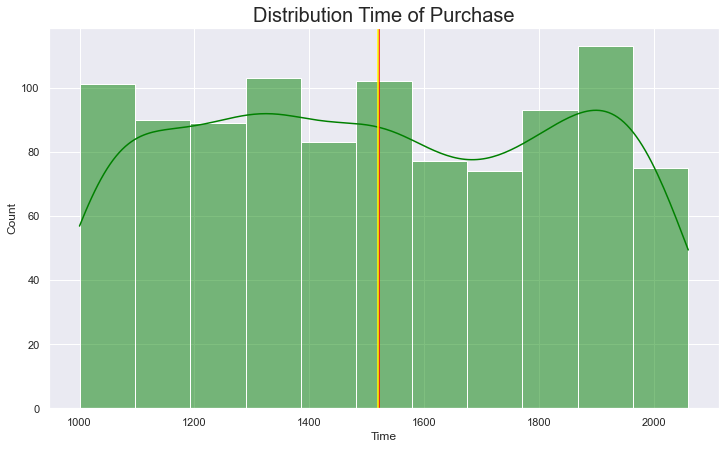

In [395]:
df_time = df.copy()
df_time['Time'] = df_time['Time'].replace({':':''}, regex=True)
df_time['Time'] = df_time['Time'].astype(float)
plt.subplots(figsize=(12, 7))
sns.histplot(data=df_time, x="Time", kde=True, color = 'green', bins =11)
plt.title('Distribution Time of Purchase', size=20)
mean = df_time["Time"].mean()
median = df_time["Time"].median()
mode = df_time["Time"].mode()
plt.axvline(mean, 0,1, color = 'red')
plt.axvline(median, 0,1, color = 'yellow')
print('mean:', mean, '\nmedian:', median, '\nmode:\n', mode)

mean: 6.9727 
median: 7.0 
mode:
 0    6.0
dtype: float64


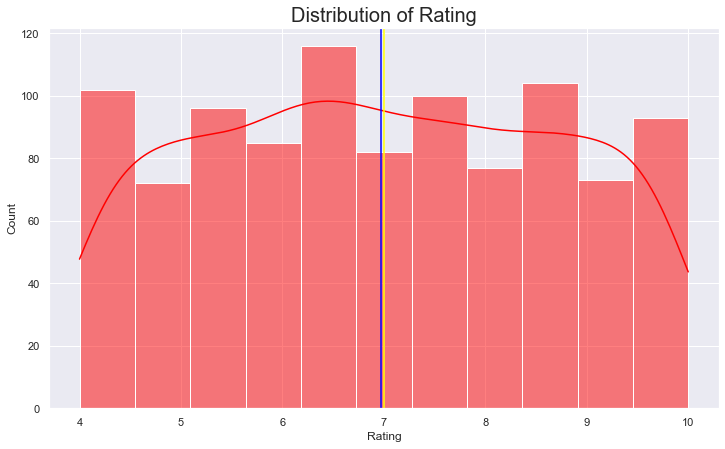

In [383]:
plt.subplots(figsize=(12, 7))
sns.histplot(data=df, x="Rating", kde=True, color = 'Red')
plt.title('Distribution of Rating', size=20)
mean = df["Rating"].mean()
median = df["Rating"].median()
mode = df_time["Rating"].mode()
plt.axvline(mean, 0,1, color = 'Blue')
plt.axvline(median, 0,1, color = 'yellow')
print('mean:', mean, '\nmedian:', median, '\nmode:\n', mode)

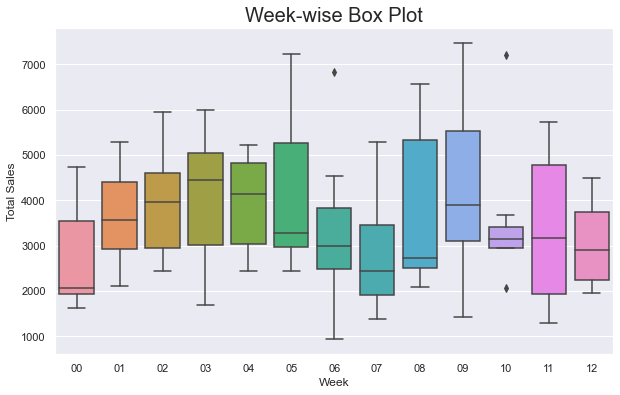

In [325]:
df_week_box = df.copy()
aggregation_functions = {'Total': 'sum'}
df_week_box = df_week_box.groupby(['Date']).aggregate(aggregation_functions).reset_index()
df_week_box["Week"] = df_week_box["Date"].dt.strftime("%U")
plt.figure(figsize=(10,6))
sns.boxplot(x="Week", y="Total", data=df_week_box)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Week-wise Box Plot", size=20)
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.show()

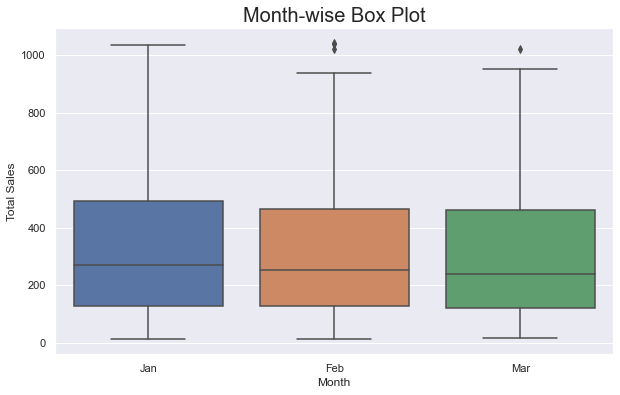

In [324]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Month'] = pd.DatetimeIndex(df_box["Date"]).month

sort_order = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_box['Month'] = df_box['Month'].apply(lambda x: calendar.month_abbr[x])
df_box.index = pd.CategoricalIndex(df_box['Month'], categories=sort_order, ordered=True)
df_box = df_box.sort_index().reset_index(drop=True)
plt.figure(figsize=(10,6))
fig2 = sns.boxplot(x='Month', y='Total', data=df_box)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Month-wise Box Plot", size=20)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

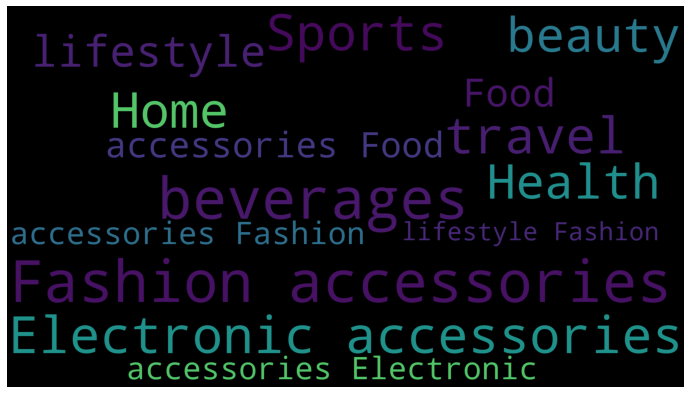

In [7]:
plt.subplots(figsize=(18,7))
wordcloud = WordCloud(background_color='Black',width=1920,height=1080).generate(" ".join(df_product['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()